In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


In [2]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["figure.dpi"] = 100

df = pd.read_pickle("../data/interim/03_houses_withfeats.pkl")

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15191 entries, 0 to 16761
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ce                      15191 non-null  object 
 1   Elevator                15191 non-null  int32  
 2   HasExactLocation        15191 non-null  int32  
 3   Lat                     15191 non-null  float64
 4   Lng                     15191 non-null  float64
 5   ListingArea             15191 non-null  float64
 6   Localization            15191 non-null  object 
 7   NetArea                 15191 non-null  float64
 8   Parking                 15191 non-null  float64
 9   PropertyType            15191 non-null  object 
 10  Rooms                   15191 non-null  float64
 11  Wcs                     15191 non-null  float64
 12  City                    15191 non-null  object 
 13  SellPrice               15191 non-null  float64
 14  Max Cluster Similarity  15191 non-null  flo

In [4]:
df.head()


,Ce,Elevator,HasExactLocation,Lat,Lng,ListingArea,Localization,NetArea,Parking,PropertyType,Rooms,Wcs,City,SellPrice,Max Cluster Similarity,log_NetArea,log_ListingArea,log_SellPrice,Wcs_per_Room
0,D,0,0,40.890590,-8.535915,430.000000,"Sandim, Olival, Lever e Crestuma, Porto",280.0,6.0,Moradia,4.0,4.0,Porto,450000.0,0.953769,5.634790,6.063785,13.017003,1.000000
1,E,0,0,38.759090,-9.229261,90.000000,"Falagueira, Amadora",80.0,0.0,Apartamento,3.0,2.0,Amadora,235000.0,0.996549,4.382027,4.499810,12.367341,0.666667
2,B,0,1,39.465263,-8.567995,150.000000,"Brogueira, Torres Novas",125.0,1.0,Moradia Isolada,3.0,2.0,Torres Novas,280000.0,0.918295,4.828314,5.010635,12.542545,0.666667
3,D,0,1,38.721205,-9.408745,96.000000,"Alcabideche, Lisboa",96.0,1.0,Apartamento,2.0,2.0,Lisboa,540000.0,0.944710,4.564348,4.564348,13.199324,1.000000
4,F,0,1,40.593400,-8.674569,204.347826,"Ílhavo (São Salvador), Aveiro",94.0,0.0,Moradia,3.0,5.0,Aveiro,169900.0,0.763079,4.543295,5.319824,12.042965,1.666667


# Split Train Test

In [5]:
y = df["SellPrice"]
y_log = df["log_SellPrice"]
X = df.drop(labels=["SellPrice", "log_SellPrice"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2)


# Feature Selection 
Wc's e Rooms foram tratados como numeric ao invés de categoria

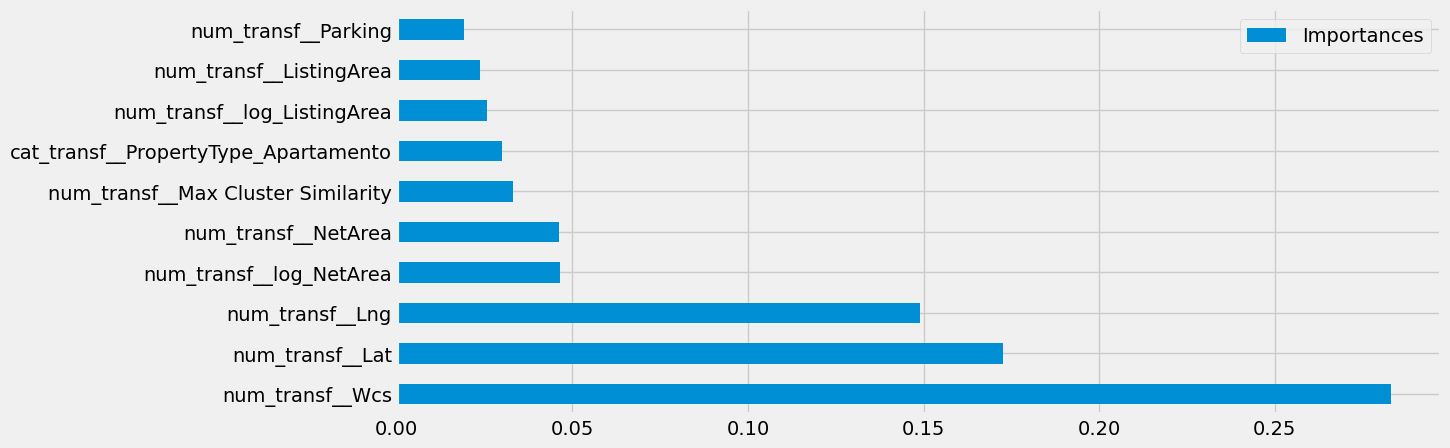

In [6]:
num_cols = X_train.select_dtypes(np.number).columns.values
object_cols = X_train.select_dtypes(object).columns.values


preprocessing = ColumnTransformer(
    [
        ("num_transf", StandardScaler(), num_cols),
        ("cat_transf", OneHotEncoder(handle_unknown="ignore"), object_cols),
    ],
    verbose_feature_names_out=True,
)

rf = make_pipeline(preprocessing, RandomForestRegressor())
rf.fit(X_train, y_train)

rf_importances = pd.DataFrame(
    {"Importances": rf.steps[1][1].feature_importances_},
    index=preprocessing.get_feature_names_out(),
)

rf_importances.sort_values(
    ["Importances"], ascending=False).head(10).plot.barh()

plt.show()


In [7]:
X_train["Rooms"] = X_train["Rooms"].astype(object)
X_train["Wcs"] = X_train["Wcs"].astype(object)

X_test["Rooms"] = X_test["Rooms"].astype(object)
X_test["Wcs"] = X_test["Wcs"].astype(object)


In [8]:
X_train["Rooms"].value_counts()

Rooms
3.0     5118
2.0     3053
4.0     1791
1.0     1204
5.0      609
6.0      215
7.0       69
8.0       40
9.0       16
10.0       9
12.0       8
11.0       5
13.0       4
14.0       4
22.0       1
17.0       1
48.0       1
23.0       1
27.0       1
20.0       1
15.0       1
Name: count, dtype: int64

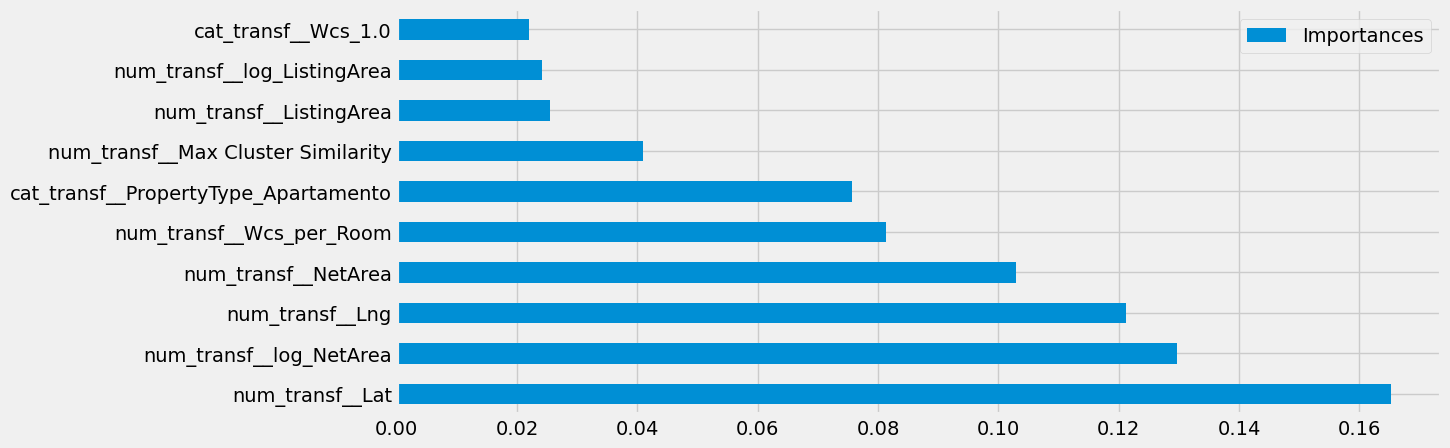

In [9]:
num_cols = X_train.select_dtypes(np.number).columns.values
object_cols = X_train.select_dtypes(object).columns.values


preprocessing = ColumnTransformer(
    [
        ("num_transf", StandardScaler(), num_cols),
        ("cat_transf", OneHotEncoder(handle_unknown="ignore"), object_cols),
    ],
    verbose_feature_names_out=True,
)

rf = make_pipeline(preprocessing, RandomForestRegressor())
rf.fit(X_train, y_train)

rf_importances = pd.DataFrame(
    {"Importances": rf.steps[1][1].feature_importances_},
    index=preprocessing.get_feature_names_out(),
)

rf_importances.sort_values(
    ["Importances"], ascending=False).head(10).plot.barh()

plt.show()


## Quick treino em alguns modelos e overfits

<Axes: >

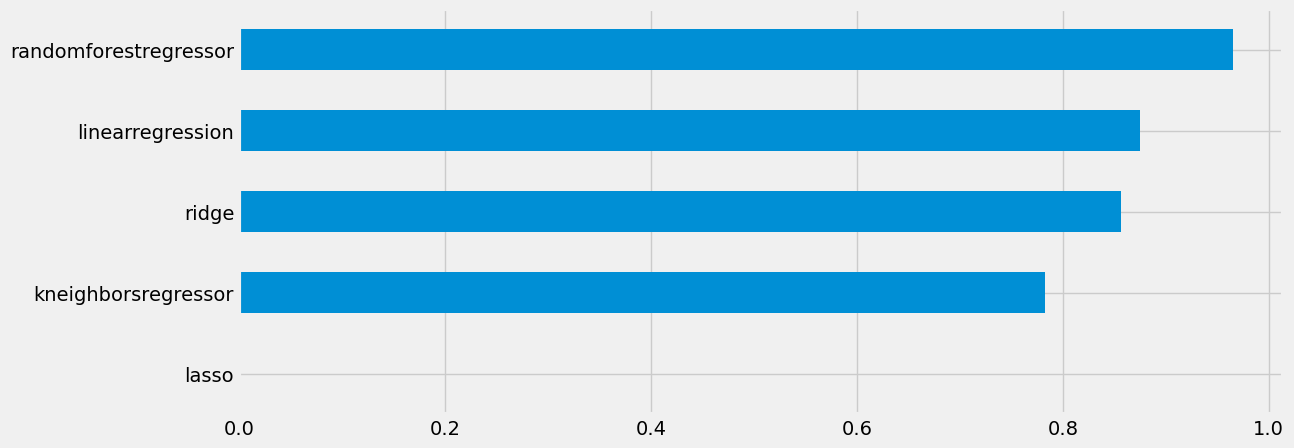

In [10]:
lr = LinearRegression()
Lasso_reg = Lasso()
Ridge_reg = Ridge()
knr = KNeighborsRegressor()
rf = RandomForestRegressor()

model_list = [lr, Lasso_reg, Ridge_reg, knr, rf]
model_results = []

for model in model_list:
    pipe = make_pipeline(preprocessing, model)
    pipe.fit(X_train, y_train)
    model_results.append(pipe)

scores = []
for model in model_results:
    score = model.score(X_train, y_train)
    scores.append(score)

# X_test_prepro = pipe[0].transform(X_test)

# model_results[1].score(X_test, y_test)
# model_results[0].steps[-1][0]

pd.Series(
    scores, index=[model.steps[-1][0] for model in model_results]
).sort_values().plot.barh()


In [11]:
pd.Series(scores, index=[model.steps[-1][0] for model in model_results]).sort_values()

lasso                    0.000000
kneighborsregressor      0.783017
ridge                    0.856731
linearregression         0.874590
randomforestregressor    0.965513
dtype: float64

<Axes: >

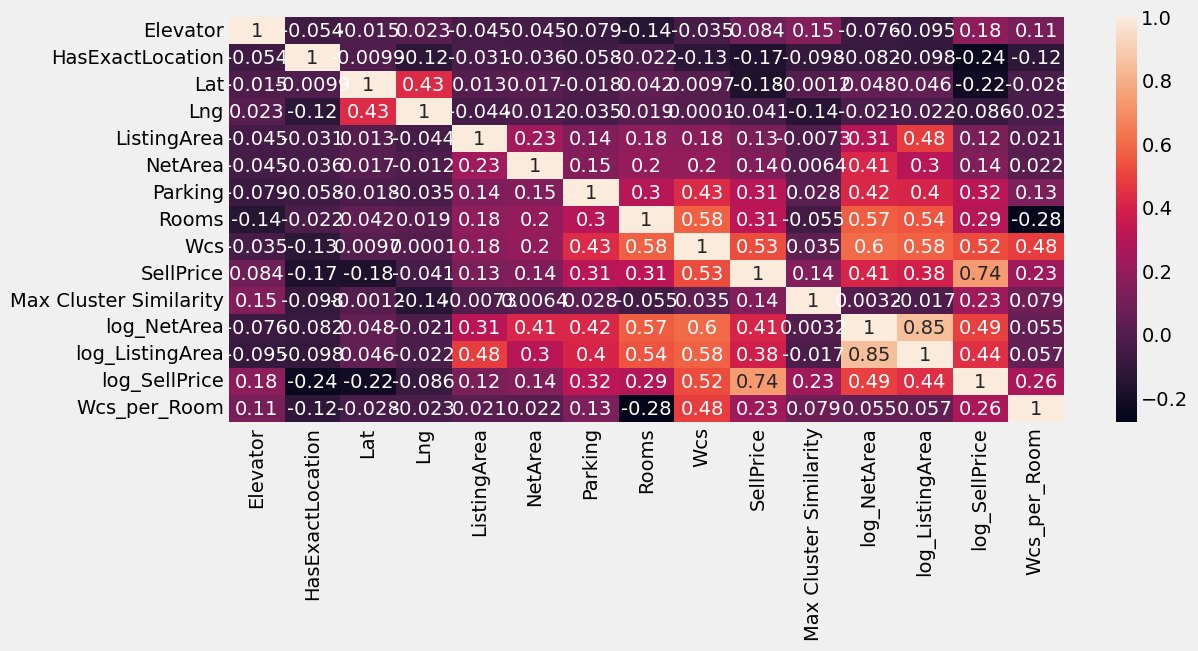

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


In [13]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_transf',
                                                  StandardScaler(),
                                                  array(['Elevator', 'HasExactLocation', 'Lat', 'Lng', 'ListingArea',
       'NetArea', 'Parking', 'Max Cluster Similarity', 'log_NetArea',
       'log_ListingArea', 'Wcs_per_Room'], dtype=object)),
                                                 ('cat_transf',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  array(['Ce', 'Localization', 'PropertyType', 'Rooms', 'Wcs', 'City'],
      dtype=object))])),
                ('randomforestregressor', RandomForestRegressor())])

In [14]:
X_train["Rooms"] = X_train["Rooms"].astype(np.number)
X_train["Wcs"] = X_train["Wcs"].astype(np.number)

X_test["Rooms"] = X_test["Rooms"].astype(np.number)
X_test["Wcs"] = X_test["Wcs"].astype(np.number)


c:\Users\paro\AppData\Local\anaconda3\Lib\site-packages\pandas\core\dtypes\common.py:1691: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
c:\Users\paro\AppData\Local\anaconda3\Lib\site-packages\pandas\core\dtypes\common.py:1691: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
c:\Users\paro\AppData\Local\anaconda3\Lib\site-packages\pandas\core\dtypes\common.py:1691: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)
c:\Users\paro\AppData\Local\anaconda3\Lib\site-packages\pandas\core\dtypes\common.py:1691: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current res

In [18]:
object_cols = X_train.select_dtypes(object).columns
# num_cols = X_train.select_dtypes(np.number).columns

preprocessing = ColumnTransformer(
    [
        (
            "cat_transf",
            OneHotEncoder(
                handle_unknown="ignore",
            ),
            object_cols,
        ),
    ],
    verbose_feature_names_out=True,
    remainder="passthrough",
)

pipe = make_pipeline(preprocessing, RandomForestRegressor())

pipe.fit(X_train, y_train)
print("Train coefficient of determination: ", pipe.score(X_train, y_train))
print("Test coefficient of determination: ", pipe.score(X_test, y_test))

0.9678978474844834

In [45]:
print(mean_squared_error(y_train, pipe.predict(X_train)))
print(mean_squared_error(y_test, pipe.predict(X_test)))

0.023823125130547417
0.1520280823317146


<Axes: >

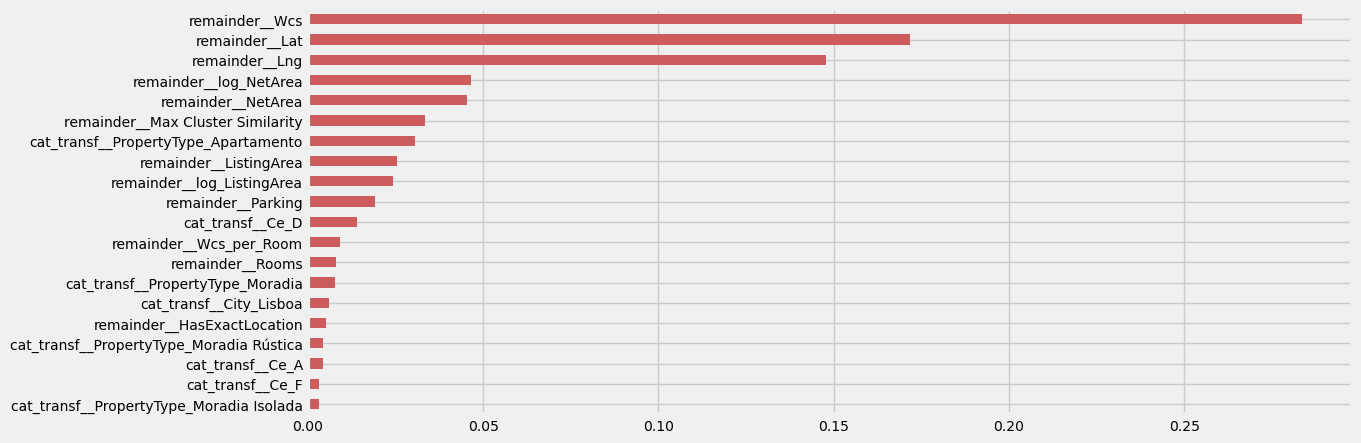

In [36]:
pd.Series(
    pipe[-1].feature_importances_, index=preprocessing.get_feature_names_out()
).sort_values(ascending=True).tail(20).plot.barh(fontsize=10, color="indianred")

In [42]:
pd.Series(
    pipe[-1].feature_importances_, index=preprocessing.get_feature_names_out()
).sort_values(ascending=False).head(20)

remainder__Wcs                              0.283577
remainder__Lat                              0.171696
remainder__Lng                              0.147697
remainder__log_NetArea                      0.046563
remainder__NetArea                          0.045371
remainder__Max Cluster Similarity           0.033515
cat_transf__PropertyType_Apartamento        0.030607
remainder__ListingArea                      0.025322
remainder__log_ListingArea                  0.024319
remainder__Parking                          0.019203
cat_transf__Ce_D                            0.014060
remainder__Wcs_per_Room                     0.009227
remainder__Rooms                            0.008158
cat_transf__PropertyType_Moradia            0.007807
cat_transf__City_Lisboa                     0.006067
remainder__HasExactLocation                 0.005090
cat_transf__PropertyType_Moradia Rústica    0.004452
cat_transf__Ce_A                            0.004325
cat_transf__Ce_F                            0.

Score boa mas tem ainda overfit
# Grid Search and CV 
- ~~Reduzir árvores~~
- ~~Aumentar o min_samples p dar split~~
- ~~Podar pelo max_depth~~
- ~~Feature selection~~
- ~~Cross - Validation~~

Outros modelos:
- ~~Gradient Boosting~~
- ~~AdaBoost~~ resultado com R de 0.6
- Stacking - arranjar estimadores mt diferentes
- HGB 


## Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

pipe = make_pipeline(
    preprocessing,
    GradientBoostingRegressor(
        learning_rate=0.1,
        n_estimators=200,
        loss="squared_error",
        criterion="friedman_mse",
        min_samples_split=4,
        max_depth=5,
        n_iter_no_change=100,
    ),
)
# learning_rate=0.1, n_estimators=100, loss="squared_error", criterion="friedman_mse", min_samples_split=4, max_depth=5, n_iter_no_change=100

pipe.fit(X_train, y_train)
print("Train coefficient of determination: ", pipe.score(X_train, y_train))
print("Test coefficient of determination: ", pipe.score(X_test, y_test))

print("Train MSE: ", mean_squared_error(y_train, pipe.predict(X_train)))
print("Test MSE: ", mean_squared_error(y_test, pipe.predict(X_test)))

Train coefficient of determination:  0.826087929541496
Test coefficient of determination:  0.7860644046105836
Train MSE:  0.129060785386367
Test MSE:  0.15138852745056375


Resultados muito bons sem overfit!! 

In [57]:
from sklearn.model_selection import GridSearchCV

params = dict(
    gradientboostingregressor__learning_rate=[0.1, 0.3, 0.7],
    gradientboostingregressor__n_estimators=[150, 200, 300],
    gradientboostingregressor__loss=["squared_error", "huber"],
    gradientboostingregressor__criterion=["friedman_mse"],
    gradientboostingregressor__min_samples_split=[4, 8],
    gradientboostingregressor__max_depth=[5, 10, 20],
    gradientboostingregressor__n_iter_no_change=[100],
)

grid_reg = GridSearchCV(
    pipe, param_grid=params, scoring="neg_root_mean_squared_error", n_jobs=-1
)

grid_reg.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_transf',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['Ce', 'Localization', 'PropertyType', 'City'], dtype='object'))])),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(max_depth=5,
                                                                  min_samples_split=4,
                                                                  n_estimators=200,
                                                                  n_iter_...
                         'gradientboostingregressor__learning_rate': [0.1, 0.3,
                                                                      0.7],
                         'gradientboostingregressor__loss': ['squared_error',
                                                             'huber'],
                         'gradientboostingregressor__max_depth': [5, 10, 20],
                         'gradientboostingregressor__min_samples_split': [4, 8],
                         'gradientboostingregressor__n_estimators': [150, 200,
                                                                     300],
                         'gradientboostingregressor__n_iter_no_change': [100]},
             scoring='neg_root_mean_squared_error')

In [58]:
grid_reg.best_estimator_


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_transf',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Ce', 'Localization', 'PropertyType', 'City'], dtype='object'))])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(loss='huber', max_depth=5,
                                           min_samples_split=4,
                                           n_estimators=300,
                                           n_iter_no_change=100))])

In [59]:
grid_reg.best_estimator_.score(X_train, y_train)


0.8312252313519781

In [60]:
grid_reg.best_estimator_.score(X_test, y_test)


0.7874135431222682

In [61]:
print(
    "Train MSE: ",
    mean_squared_error(y_train, grid_reg.best_estimator_.predict(X_train)),
)
print(
    "Test MSE: ", mean_squared_error(y_test, grid_reg.best_estimator_.predict(X_test))
)

Train MSE:  0.1252483748694913
Test MSE:  0.15043382848034798


Hist 